In [1]:
import datetime
import pandas as pd
import numpy as np
data = {}
data["Data"] = pd.read_excel("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2]).rename(columns = {"gdppc":"Real GDP Per Capita", 
                                                         "pop":"Population"})
data["Data"]["Real GDP"] = data["Data"]["Real GDP Per Capita"].mul(data["Data"]["Population"])
data

{'Data':                       country  Real GDP Per Capita   Population      Real GDP
 countrycode year                                                             
 AFG         1820  Afghanistan                  NaN   3280.00000           NaN
             1870  Afghanistan                  NaN   4207.00000           NaN
             1913  Afghanistan                  NaN   5730.00000           NaN
             1950  Afghanistan            1156.0000   8150.00000  9.421400e+06
             1951  Afghanistan            1170.0000   8284.00000  9.692280e+06
 ...                       ...                  ...          ...           ...
 ZWE         2014     Zimbabwe            1594.0000  13313.99205  2.122250e+07
             2015     Zimbabwe            1560.0000  13479.13812  2.102746e+07
             2016     Zimbabwe            1534.0000  13664.79457  2.096179e+07
             2017     Zimbabwe            1582.3662  13870.26413  2.194784e+07
             2018     Zimbabwe            16

In [2]:
data["Log"] = data["Data"].copy()
data["Rates"] = data["Data"].copy()
for key, val in data["Data"].items():
    try:
        data["Log"][key] = np.log(val)
        data["Rates"][key] = data["Log"][key].groupby("countrycode").diff()
    except:
        print(key + " is type:", val.dtypes)

country is type: object


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
data

{'Data':                       country  Real GDP Per Capita   Population      Real GDP
 countrycode year                                                             
 AFG         1820  Afghanistan                  NaN   3280.00000           NaN
             1870  Afghanistan                  NaN   4207.00000           NaN
             1913  Afghanistan                  NaN   5730.00000           NaN
             1950  Afghanistan            1156.0000   8150.00000  9.421400e+06
             1951  Afghanistan            1170.0000   8284.00000  9.692280e+06
 ...                       ...                  ...          ...           ...
 ZWE         2014     Zimbabwe            1594.0000  13313.99205  2.122250e+07
             2015     Zimbabwe            1560.0000  13479.13812  2.102746e+07
             2016     Zimbabwe            1534.0000  13664.79457  2.096179e+07
             2017     Zimbabwe            1582.3662  13870.26413  2.194784e+07
             2018     Zimbabwe            16

Text(0.5, 0.94, 'Real GDP per Capita\nGreat Britain')

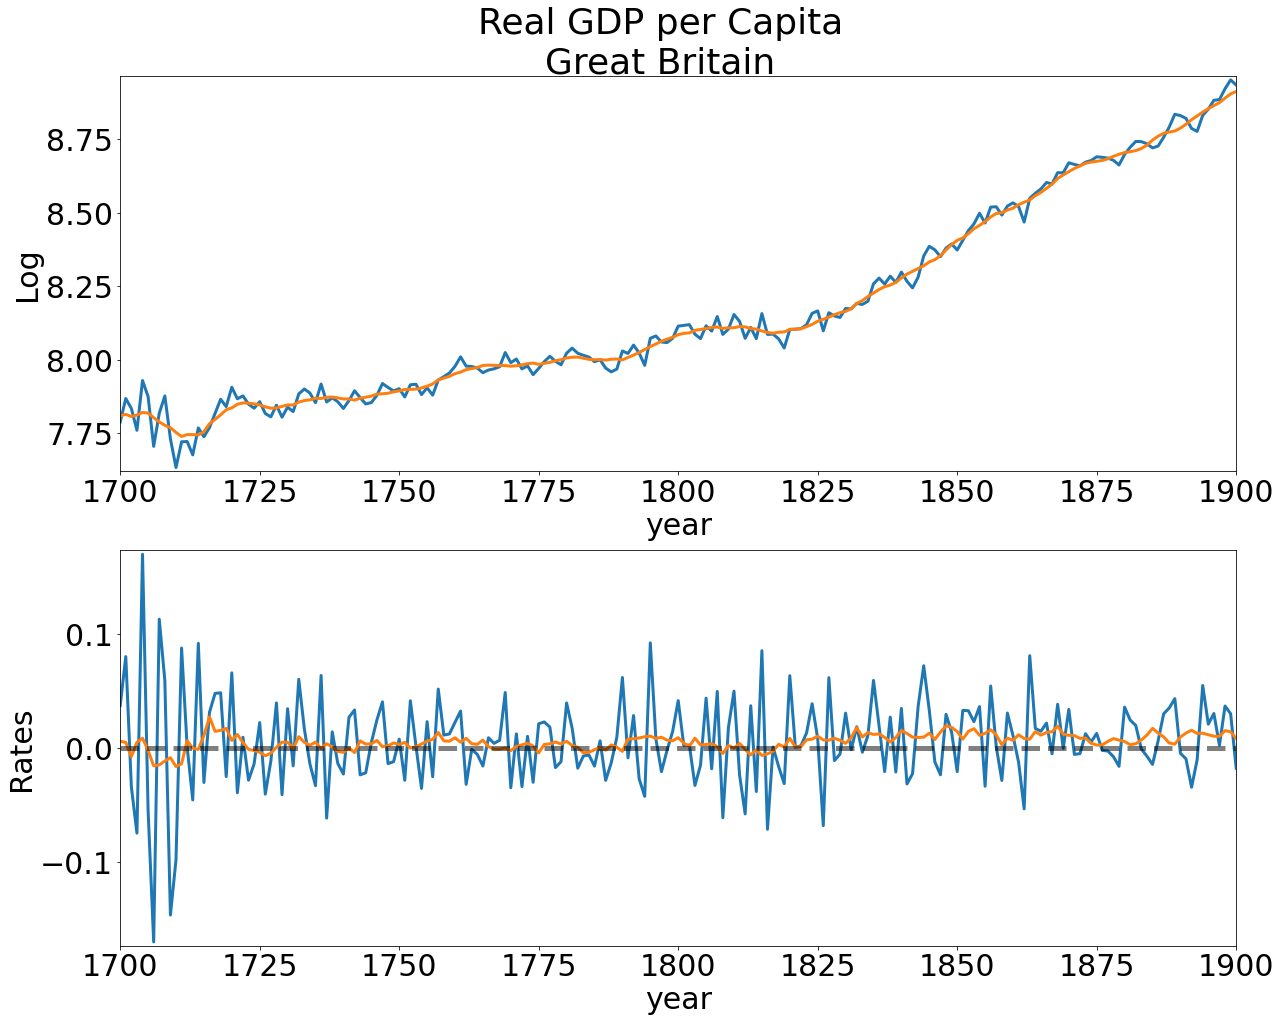

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams['axes.xmargin'] = 0.00
plt.rcParams.update({'font.size': 30})
fig, axs = plt.subplots(2,1, figsize = (20,16))
plot_keys = ["Log", "Rates"]
for i in range(len(plot_keys)):
    key = plot_keys[i]
    ax = axs[i]
    data[key].loc["GBR"]["Real GDP Per Capita"].loc["1700":"1900"].dropna().plot.line(linewidth = 3, ax = ax)
    data[key].loc["GBR"]["Real GDP Per Capita"].rolling(10, center = True).mean().loc["1700":"1900"].dropna().plot.line(linewidth = 3, ax = ax)
    ax.set_ylabel(key)
axs[1].axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
plt.suptitle("Real GDP per Capita\nGreat Britain", y = .94)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_27984\3146873589.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y, 2) for y in ax.get_yticks()],color = color)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_27984\3146873589.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y, 2) for y in ax.get_yticks()],color = color)


Text(0.5, 1.0, 'Log Values\nGreat Britain')

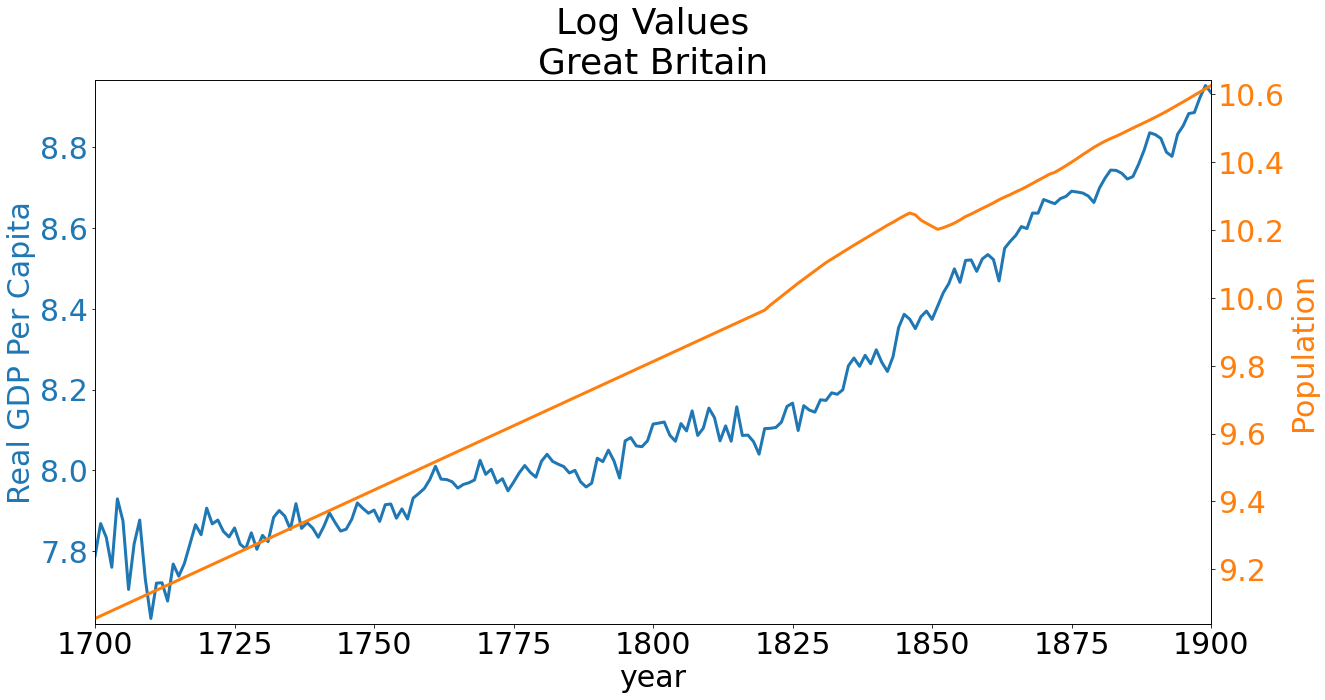

In [5]:
axs = {}
fig, axs[0] = plt.subplots(figsize = (20,10))
axs[1] = axs[0].twinx()
plot_keys = ["Real GDP Per Capita", "Population"]
for i in range(len(plot_keys)):
    ax = axs[i]
    key = plot_keys[i]
    color = "C" + str(i)
    data["Log"].loc["GBR"][key].loc["1700":"1900"].dropna().plot.line(linewidth = 3, 
                                                                    color = color,
                                                                          ax = ax)
    ax.set_ylabel(key, color = color)
    ax.set_yticklabels([round(y, 2) for y in ax.get_yticks()],color = color)
ax.set_title("Log Values\nGreat Britain")

In [6]:
UK_wage_data= {"Data":pd.read_excel("FeinsteinData.xlsx",
                                    index_col = [0], 
                                   parse_dates = True)}
UK_wage_data["Log"] = np.log(UK_wage_data["Data"])
UK_wage_data["Rate"] = UK_wage_data["Log"].diff()

In [7]:
UK_wage_data["Data"].keys()

Index(['Nominal Wages', 'Cost of Living', 'Full Employment Real Earnings',
       'Real Earnings Adjusted for Unemployment GB',
       'Real Earnings Adjusted for Unemployment UK'],
      dtype='object')

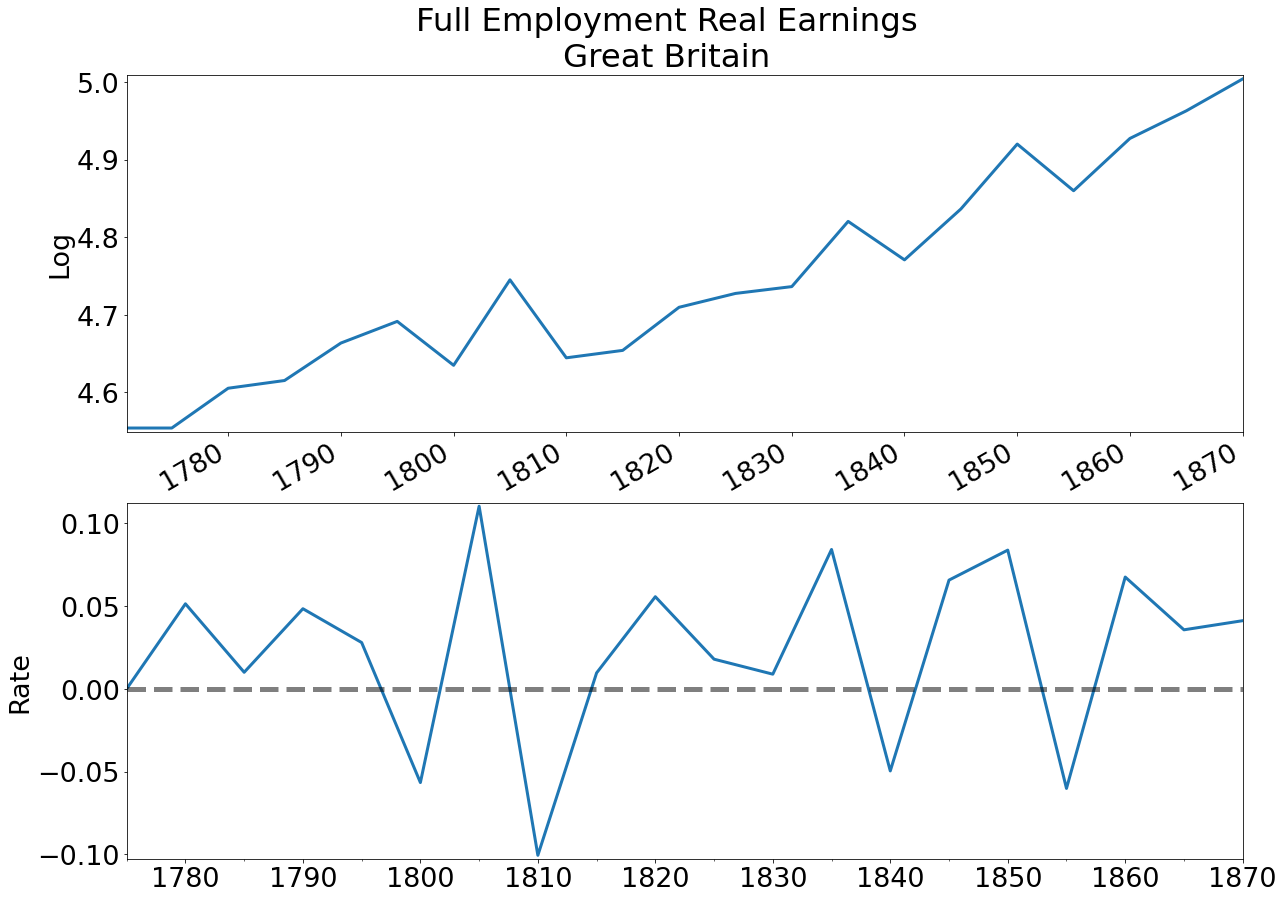

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams['axes.xmargin'] = 0.00
plt.rcParams.update({'font.size': 27})
fig, axs = plt.subplots(2,1, figsize = (20,16))
plot_keys = ["Log", "Rate"]
variable = "Full Employment Real Earnings"
for i in range(len(plot_keys)):
    key = plot_keys[i]
    ax = axs[i]
    UK_wage_data[key][variable].dropna().plot.line(linewidth = 3, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(key)
plt.suptitle(variable + "\nGreat Britain", y = .94)
axs[1].axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)

# fig, ax = plt.subplots(figsize = (20,10))
# ax2 = ax.twinx()
# data["Log"].loc["GBR"]["pop"].loc["1700":"1900"].dropna().plot.line(linewidth = 3, color = "C1", ax = ax2)


Text(0.5, 1.0, 'Population')

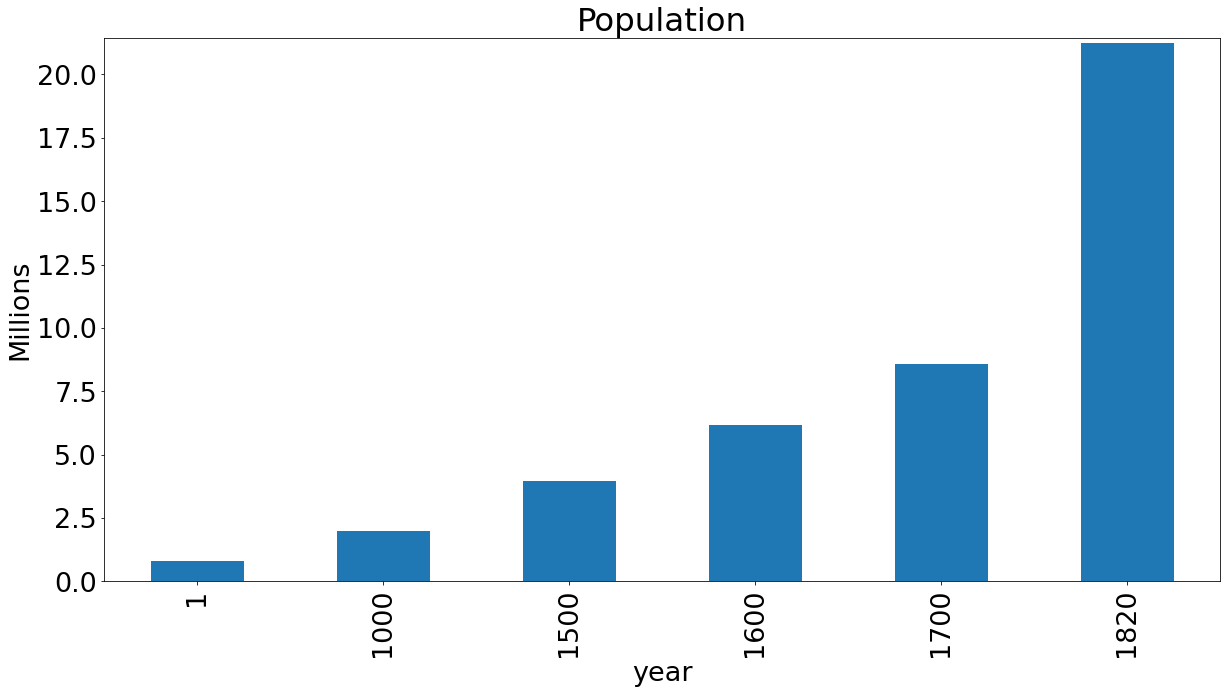

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
data["Data"].loc["GBR"][["Population"]].div(1000).dropna().loc[:1820].plot.bar(ax = ax, legend = False)
ax.set_ylabel("Millions")
ax.set_title("Population")

In [10]:
plot_data = data["Data"]
countries = plot_data["country"].unique()
countries

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

In [11]:
euro_countries = ["United Kingdom","France", "Germany", "Portugal","Spain","Italy","Netherlands","Denmark","Belgium","Austria"]
euro_data = plot_data[plot_data["country"].isin(euro_countries)]
euro_data = euro_data[euro_data.index.get_level_values("year") < 1901]
euro_data

country  Real GDP Per Capita  Population    Real GDP
countrycode year                                                       
AUT         1      Austria                  NaN       500.0         NaN
            1000   Austria                  NaN       700.0         NaN
            1500   Austria                  NaN      2000.0         NaN
            1600   Austria                  NaN      2500.0         NaN
            1700   Austria                  NaN      2500.0         NaN
...                    ...                  ...         ...         ...
PRT         1896  Portugal               1793.0      5252.0   9416836.0
            1897  Portugal               1884.0      5290.0   9966360.0
            1898  Portugal               1935.0      5327.0  10307745.0
            1899  Portugal               1991.0      5366.0  10683706.0
            1900  Portugal               2075.0      5404.0  11213300.0

[3251 rows x 4 columns]

In [12]:
pop_table = euro_data.reset_index().pivot(index='year', columns='country', values='Population')
pop_sum =pop_table.sum(axis = 1)
index = pop_sum[pop_sum>0].index

In [13]:
gdp_table = euro_data.reset_index().pivot(index='year', columns='country', values='Real GDP')
gdppc_table = euro_data.reset_index().pivot(index='year', columns='country', values='Real GDP Per Capita')

C:\Users\JLCat\AppData\Local\Temp\ipykernel_27984\2785856610.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(str(format(int(y * 10** 3), ',')) for y in ax.get_yticks())


Text(0.5, 1.0, 'Population')

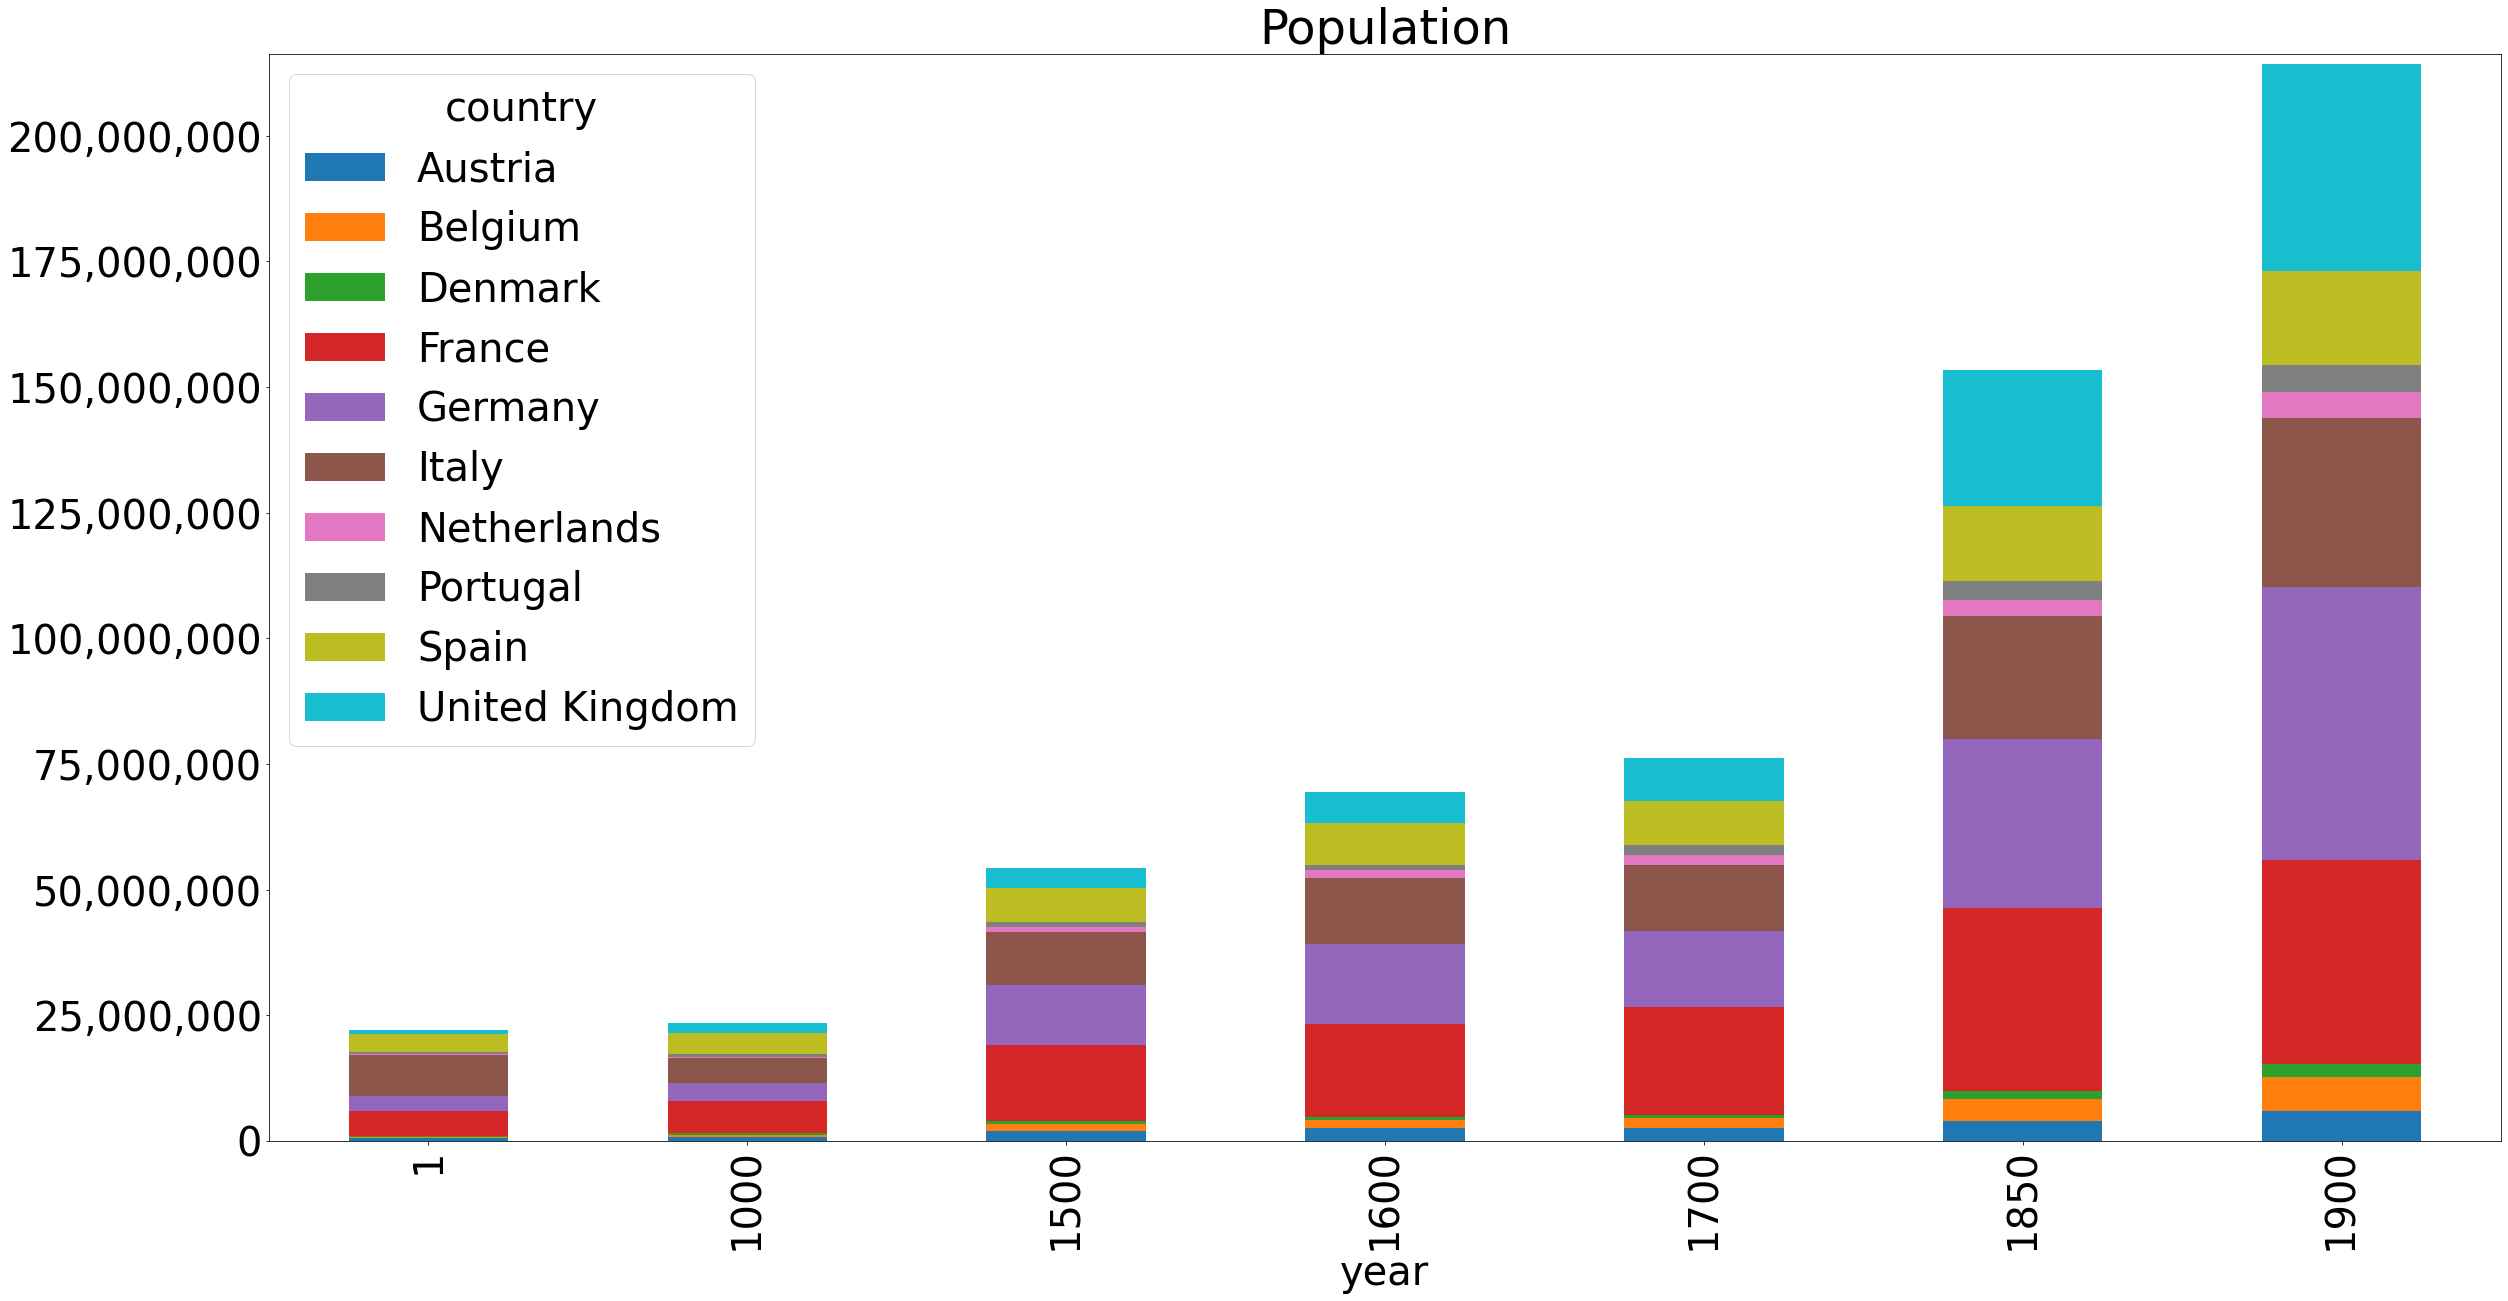

In [14]:
plt.rcParams.update({'font.size': 40})
plot_years = [1,1000,1500,1600,1700,1850,1900]
fig, ax = plt.subplots(figsize = (40,20))
pop_table.loc[plot_years].plot.bar(stacked = True, ax = ax)
ax.set_yticklabels(str(format(int(y * 10** 3), ',')) for y in ax.get_yticks())
ax.set_title("Population")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_27984\301546094.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels("$" + str(format(int(y), ',')) for y in ax.get_yticks())


[Text(0, 0.0, '$0'),
 Text(0, 200000000.0, '$200,000,000'),
 Text(0, 400000000.0, '$400,000,000'),
 Text(0, 600000000.0, '$600,000,000'),
 Text(0, 800000000.0, '$800,000,000'),
 Text(0, 1000000000.0, '$1,000,000,000'),
 Text(0, 1200000000.0, '$1,200,000,000')]

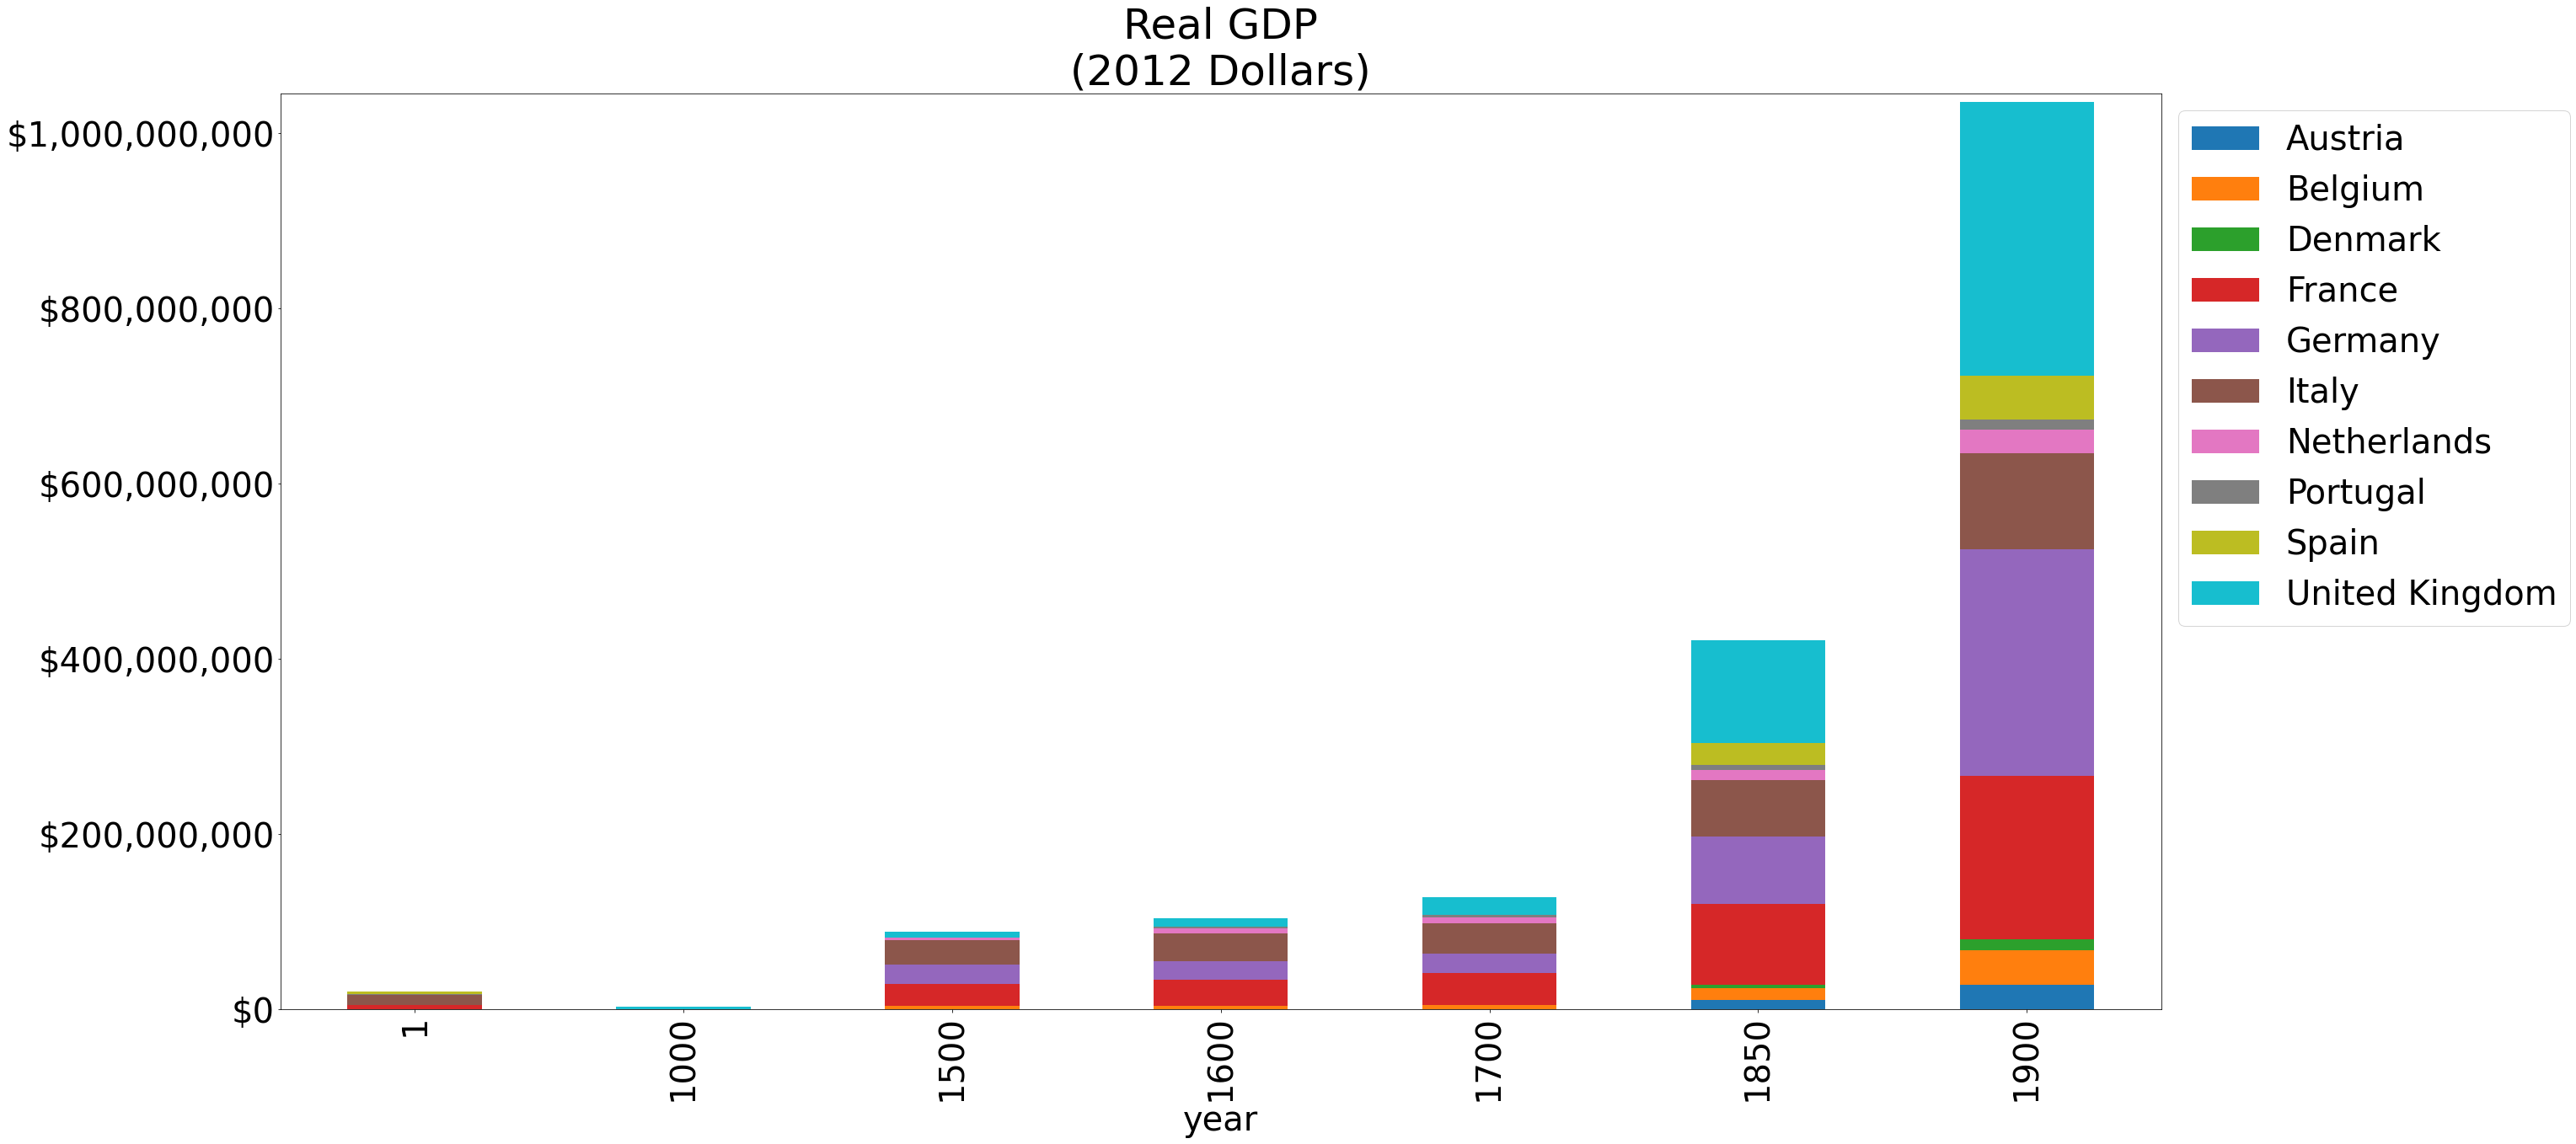

In [17]:
fig, ax = plt.subplots(figsize = (40,20))
gdp_table.loc[plot_years[:]].plot.bar(stacked = True, ax = ax)
ax.legend(bbox_to_anchor = (1,1))
ax.set_title("Real GDP\n(2012 Dollars)", fontsize = 50)
ax.set_yticklabels("$" + str(format(int(y), ',')) for y in ax.get_yticks())

C:\Users\JLCat\AppData\Local\Temp\ipykernel_27984\375001197.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels("$" + str(format(int(y), ',')) for y in ax.get_yticks())


[Text(0, 0.0, '$0'),
 Text(0, 1000.0, '$1,000'),
 Text(0, 2000.0, '$2,000'),
 Text(0, 3000.0, '$3,000'),
 Text(0, 4000.0, '$4,000'),
 Text(0, 5000.0, '$5,000'),
 Text(0, 6000.0, '$6,000'),
 Text(0, 7000.0, '$7,000'),
 Text(0, 8000.0, '$8,000')]

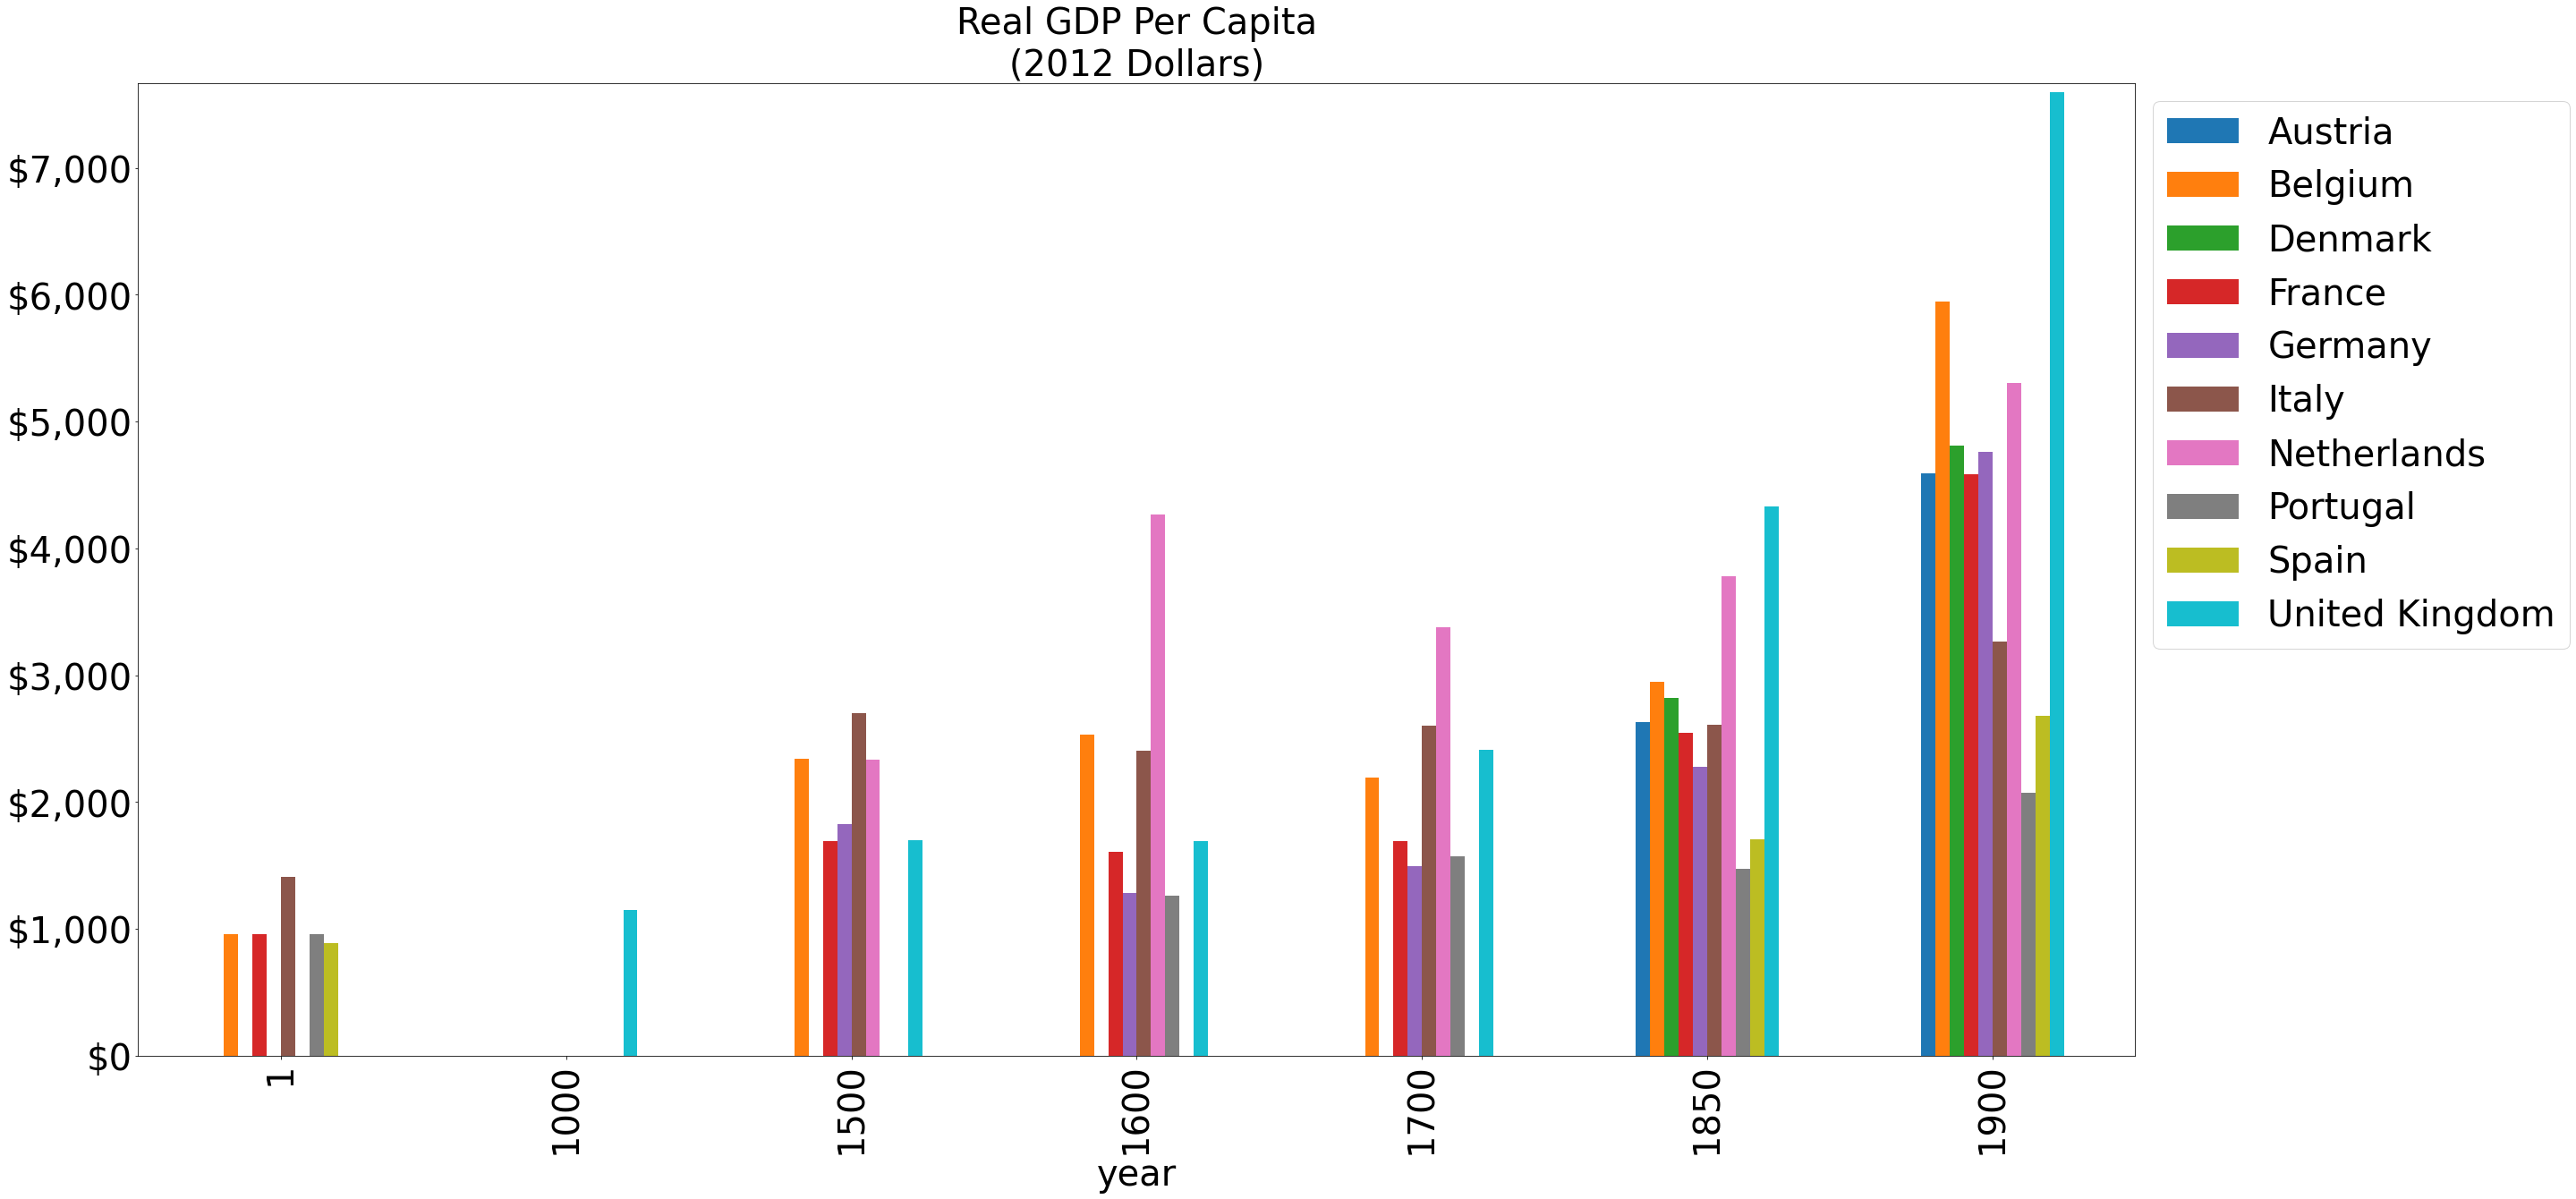

In [18]:
fig, ax = plt.subplots(figsize = (40,20))
gdppc_table.loc[plot_years[:]].plot.bar( ax = ax)
ax.set_title("Real GDP Per Capita\n(2012 Dollars)", fontsize = 40)
ax.legend(bbox_to_anchor = (1,1))
ax.set_yticklabels("$" + str(format(int(y), ',')) for y in ax.get_yticks())

In [41]:
sorted(data["Data"].index.get_level_values("year").unique())
df = data["Data"]

before_1700 = df[df.index.get_level_values("year") <= 1700]
before_1700[before_1700["country"] == "United Kingdom"].dropna()

country  Real GDP Per Capita  Population    Real GDP
countrycode year                                                             
GBR         1000  United Kingdom               1151.0      2000.0   2302000.0
            1500  United Kingdom               1697.0      3942.0   6689574.0
            1600  United Kingdom               1691.0      6170.0  10433470.0
            1700  United Kingdom               2412.0      8565.0  20658780.0

In [19]:
files = pd.ExcelFile("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx")#, 
#                      sheet_name = "Full data", 
#                      index_col = [0,2]).rename(columns = {"gdppc":"Real GDP Per Capita", 
#                                                          "pop":"Population"})
dir(files)

['ODFReader',
 'OpenpyxlReader',
 'PyxlsbReader',
 'XlrdReader',
 '__annotations__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_engines',
 '_io',
 '_reader',
 'book',
 'close',
 'engine',
 'io',
 'parse',
 'sheet_names',
 'storage_options']

In [22]:
for sheet_name in files.sheet_names:
    print(pd.read_excel(files, sheet_name = sheet_name))

                 Maddison Project Database (MPD) 2020  \
0                                     Citation policy   
1                                                 NaN   
2   CONDITIONS UNDER WHICH ALL ORIGINAL PAPERS MUS...   
3                                                 NaN   
4       a) If the data is shown in any graphical form   
5   b) If subsets of the full dataset that include...   
6                                                 NaN   
7   When neither a) or b) apply, then the MPD as a...   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                            Sources   
15                                          Full data   
16                             

    Population Afghanistan        Angola      Albania United Arab Emirates  \
0         year         AFG           AGO          ALB                  ARE   
1            1         NaN           NaN          200                  NaN   
2          730         NaN           NaN          NaN                  NaN   
3         1000         NaN           NaN          200                  NaN   
4         1090         NaN           NaN          NaN                  NaN   
..         ...         ...           ...          ...                  ...   
769       2014       31823  19623.344871  3025.656671          9203.179059   
770       2015       32564  20353.175079  3034.742029          9251.845912   
771       2016       33332  21097.110441  3044.074833          9349.808866   
772       2017   34124.811  21858.195117  3053.484775          9475.881235   
773       2018   34940.837  22637.958642  3062.734429          9619.465681   

        Argentina      Armenia     Australia      Austria   Aze